In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [215]:
# Preprocessing
# Load the dataset
url2014 = './survey_2014.csv'
data = pd.read_csv(url2014)

#url2016 = './survey_2016.csv'
#df2016 = pd.read_csv(url2016)

#print labels from df
print(data.columns)



#Look at what is in the 'Work_interfere' column to choose a suitable method to fill nan values.
data['work_interfere'].unique()

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [216]:
from sklearn.impute import SimpleImputer
import numpy as np
columns_to_drop = ['state', 'comments', 'Timestamp']
for column in columns_to_drop:
    if column in data.columns:
        data = data.drop(columns=[column])


# Fill in missing values in work_interfere column
data['work_interfere'] = np.ravel(SimpleImputer(strategy = 'most_frequent').fit_transform(data['work_interfere'].values.reshape(-1,1)))
data['self_employed'] = np.ravel(SimpleImputer(strategy = 'most_frequent').fit_transform(data['self_employed'].values.reshape(-1,1)))

data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [217]:
#Check unique data in gender columns
print(data['Gender'].unique())
print('')
print('-'*75)
print('')
#Check number of unique data too.
print('number of unique Gender in our dataset is :', data['Gender'].nunique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

---------------------------------------------------------------------------

number of unique Gender in our dataset is : 49


In [218]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

print(data['Gender'].unique())

['Female' 'Male' 'Other']


In [219]:
if data.isnull().sum().sum() == 0:
    print('There is no missing data')
else:
    print('There is {} missing data'.format(data.isnull().sum().sum()))

There is no missing data


In [220]:
#Let's check duplicated data.
if data.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('There is {} duplicated data:'.format(data.duplicated().sum()))
    #If there is duplicated data drop it.
    data.drop_duplicates(inplace=True)
    
print('-'*50)
print(data.duplicated().sum())

There is 4 duplicated data:
--------------------------------------------------
0


In [221]:
#We had a lot of nonsense answers in the Age column too
#This filtering will drop entries exceeding 100 years and those indicating negative values.
data.drop(data[data['Age']<0].index, inplace = True)
data.drop(data[data['Age']>99].index, inplace = True)

print(data['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]


c:\Users\robin\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\robin\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\robin\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


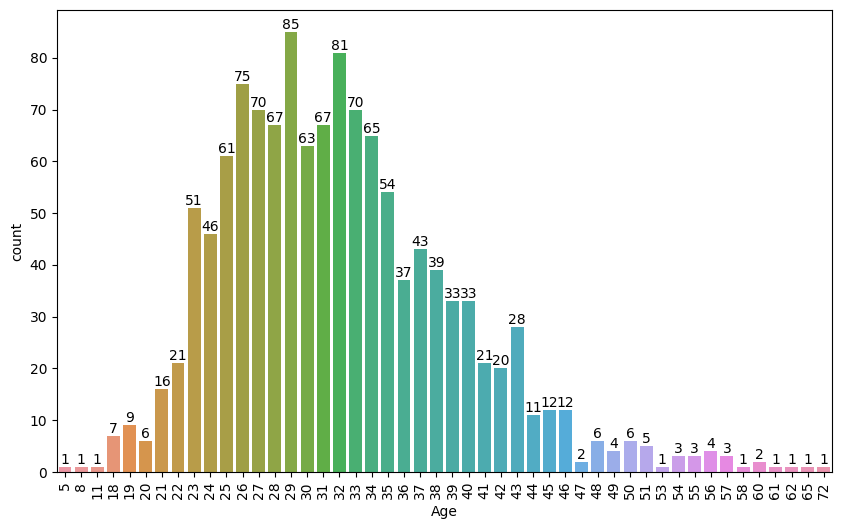

In [222]:
#Let's see the Age distribution in this dataset.
plt.figure(figsize = (10,6))
age_range_plot = sns.countplot(data = data, x = 'Age');
age_range_plot.bar_label(age_range_plot.containers[0]);
plt.xticks(rotation=90);

c:\Users\robin\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\robin\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

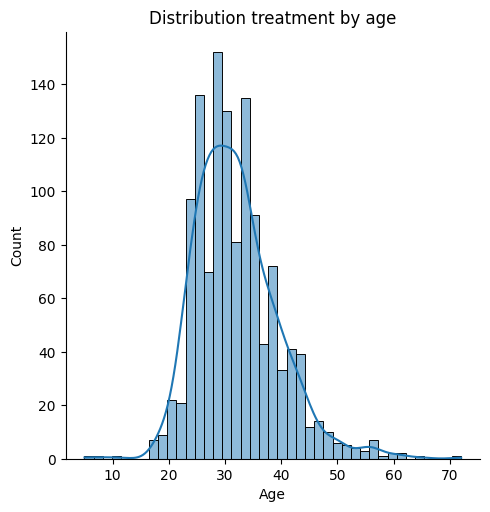

In [223]:


#In this plot moreover on Age distribution we can see treatment distribution by age
plt.figure(figsize=(10, 6));
sns.displot(data['Age'], kde = 'treatment');
plt.title('Distribution treatment by age');



c:\Users\robin\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\robin\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\robin\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


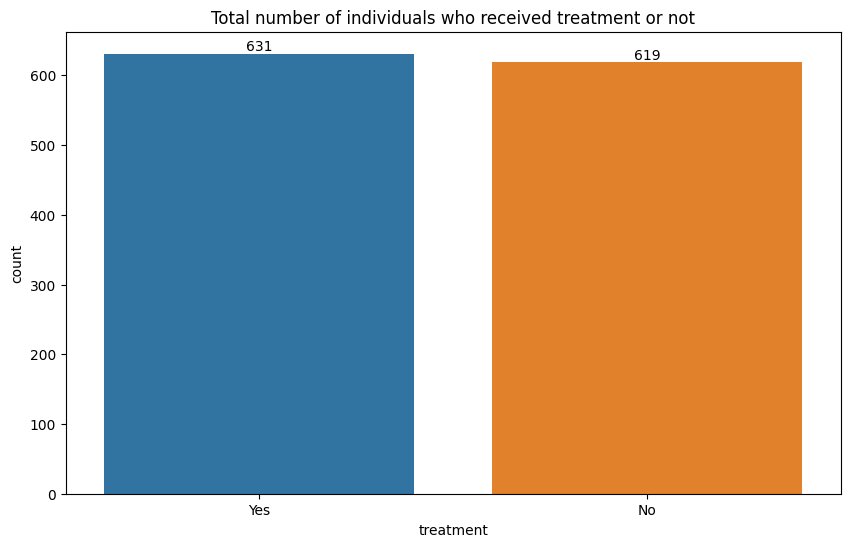

In [224]:


#In this plot We can see Total number of individuals who received treatment or not.
plt.figure(figsize = (10,6));
treat = sns.countplot(data = data,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');



In [225]:
#Use LabelEncoder to change the Dtypes to 'int'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Make the dataset include all the columns we need to change their dtypes
columns_to_encode = ['Gender', 'Country', 'self_employed','family_history', 'treatment', 'work_interfere','no_employees',
                             'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
                             'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                             'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
                             'mental_vs_physical', 'obs_consequence']
#Write a Loop for fitting LabelEncoder on columns_to_encode
for columns in columns_to_encode:
    data[columns] = le.fit_transform(data[columns])
    
#data.info()

#data = data['Gender', 'Country', 'treatment', 'seek_help', 'tech_company', 'remote_work']

new_data = pd.DataFrame().assign(Age=data['Age'],Gender=data['Gender'], Country=data['Country'], seek_help=data['seek_help'], tech_company=data['tech_company'], remote_work=data['remote_work'], goodEmployee=data['treatment'])

In [226]:


#Let's check Standard deviation 
new_data.describe()



,Age,Gender,Country,seek_help,tech_company,remote_work,goodEmployee
count,1250.00000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,32.02400,0.81760,37.792800,0.907200,0.820000,0.298400,0.504800
std,7.38408,0.42388,13.334981,0.692656,0.384341,0.457739,0.500177
min,5.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.00000,1.00000,42.000000,0.000000,1.000000,0.000000,0.000000
50%,31.00000,1.00000,45.000000,1.000000,1.000000,0.000000,1.000000
75%,36.00000,1.00000,45.000000,1.000000,1.000000,1.000000,1.000000
max,72.00000,2.00000,46.000000,2.000000,1.000000,1.000000,1.000000


In [227]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

new_data['Age'] = MaxAbsScaler().fit_transform(new_data[['Age']])
new_data['Country'] = StandardScaler().fit_transform(new_data[['Country']])


new_data.describe()

,Age,Gender,Country,seek_help,tech_company,remote_work,goodEmployee
count,1250.000000,1250.00000,1.250000e+03,1250.000000,1250.000000,1250.000000,1250.000000
mean,0.444778,0.81760,3.979039e-17,0.907200,0.820000,0.298400,0.504800
std,0.102557,0.42388,1.000400e+00,0.692656,0.384341,0.457739,0.500177
min,0.069444,0.00000,-2.835244e+00,0.000000,0.000000,0.000000,0.000000
25%,0.375000,1.00000,3.156273e-01,0.000000,1.000000,0.000000,0.000000
50%,0.430556,1.00000,5.406895e-01,1.000000,1.000000,0.000000,1.000000
75%,0.500000,1.00000,5.406895e-01,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.00000,6.157103e-01,2.000000,1.000000,1.000000,1.000000


In [228]:
from sklearn.model_selection import train_test_split

#I wanna work on 'treatment' column.
X = new_data.drop(columns = ['remote_work'])
y = new_data['remote_work']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, y_train.shape)
print('-'*30)
print(X_test.shape, y_test.shape)
print('_'*30)

(937, 6) (937,)
------------------------------
(313, 6) (313,)
______________________________


In [229]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT

In [230]:
steps_svc = [('Scaler', StandardScaler()),
             ('clf', SVC())]



clf_svc = Pipeline(steps=steps_svc)


clf_svc.fit(X_train, y_train)

y_pred_svc = clf_svc.predict(X_test)
print('SVC accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_svc)*100)

SVC accuracy : 73.48242811501598


In [231]:
#ANN Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(48, activation='relu', input_shape=[6]),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=1)

y_pred_ann = model.predict(X_test)
y_pred_ann = np.round(y_pred_ann)

print('ANN accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_ann)*100)

Epoch 1/15


937/937 [==============================] - 3s 2ms/step - loss: 0.6318 - accuracy: 0.6745
Epoch 2/15
937/937 [==============================] - 2s 2ms/step - loss: 0.6206 - accuracy: 0.6873
Epoch 3/15
937/937 [==============================] - 2s 2ms/step - loss: 0.6145 - accuracy: 0.6852
Epoch 4/15
937/937 [==============================] - 2s 2ms/step - loss: 0.6111 - accuracy: 0.6873
Epoch 5/15
937/937 [==============================] - 2s 2ms/step - loss: 0.6116 - accuracy: 0.6862
Epoch 6/15
937/937 [==============================] - 2s 2ms/step - loss: 0.6095 - accuracy: 0.6852
Epoch 7/15
937/937 [==============================] - 2s 2ms/step - loss: 0.6069 - accuracy: 0.6873
Epoch 8/15
937/937 [==============================] - 2s 2ms/step - loss: 0.6057 - accuracy: 0.6862
Epoch 9/15
937/937 [==============================] - 2s 2ms/step - loss: 0.6043 - accuracy: 0.6894
Epoch 10/15
937/937 [==============================] - 2s 2ms/step - loss: 0.6032 - accuracy: 0.6830
Epoch 11/1

In [234]:
# save both models using pickle
import pickle

pickle.dump(clf_svc, open('svc_model.pkl', 'wb'))
pickle.dump(model, open('ann_model.pkl', 'wb'))



Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-11-04 05:25:57         2256
metadata.json                                  2023-11-04 05:25:57           64
variables.h5                                   2023-11-04 05:25:57        55248


In [233]:
print(X_test[:1].values)
y_pred_ann2 = model.predict(X_test)
print(y_pred_ann2[:1])

[[ 0.36111111  0.         -1.18478763  0.          1.          0.        ]]
10/10 [==============================] - 0s 1ms/step
[[0.39243358]]
